In [ ]:
import pandas as pd
import numpy as np
from itertools import product

import oracles
import optimization

Будем использовать датасет w8a.

In [ ]:
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a

--2022-04-22 23:25:42--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3478238 (3.3M)
Saving to: ‘w8a.2’

w8a.2               100%[===================>]   3.32M  2.52MB/s    in 1.3s    

2022-04-22 23:25:45 (2.52 MB/s) - ‘w8a.2’ saved [3478238/3478238]



In [ ]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

data = ["w8a"]

@mem.cache
def get_data(name):
    data = load_svmlight_file(name)
    return data[0], data[1]

for d in data:
    X, y = get_data(d)
    display(X)

<49749x300 sparse matrix of type '<class 'numpy.float64'>'
	with 579586 stored elements in Compressed Sparse Row format>

In [ ]:
for d in data:
    X, y = get_data(d)
    print(d, ": ", X.shape, sep='')

w8a: (49749, 300)


In [ ]:
import matplotlib.pyplot as plt 
colors=['green', 'purple', 'orange', 'red', 'blue', 'pink', 'yellow', 'black', 'olive']
gammas = [5, 10, 20, 50, 100, 200, 300]
arr = []

In [ ]:
def gamma_time(X, y, dataset):
  fig, ax = plt.subplots(figsize=(12, 8))
  lab = 'Чувствительность метода барьеров к $\gamma$'
  plt.xlabel('Время работы, секунды', fontsize=17)
  plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.title(lab, fontsize=20)
  ax.grid()
  plt.yscale('log')
  name = "gamma_time"

  for i, gamma in enumerate(gammas):
    x_0 = np.ones(X.shape[1]) / 2
    u_0 = np.ones(X.shape[1])
    x_opt, message, history = optimization.barrier_method_lasso(X, y, 1, x_0, u_0,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True,
                                                                       gamma = gamma)
    arr.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], label='$\gamma = $' + str(gamma), color=colors[i])

  ax.legend(fontsize=15)
  plt.savefig(name, bbox_inches="tight")
  plt.show()

In [ ]:
def gamma_vel(X, y, dataset):
  fig, ax = plt.subplots(figsize=(12, 8))
  lab = 'Чувствительность метода барьеров к $\gamma$'
  plt.xlabel('Итерация', fontsize=17)
  plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.title(lab, fontsize=20)
  ax.grid()
  plt.yscale('log')
  name = "gamma_vel"
    
  for i, gamma in enumerate(gammas):
    plt.plot(np.arange(len(arr[i])), arr[i], label='$\gamma = $' + str(gamma), color=colors[i])

  ax.legend(fontsize=15)
  plt.savefig(name, bbox_inches="tight")
  plt.show()

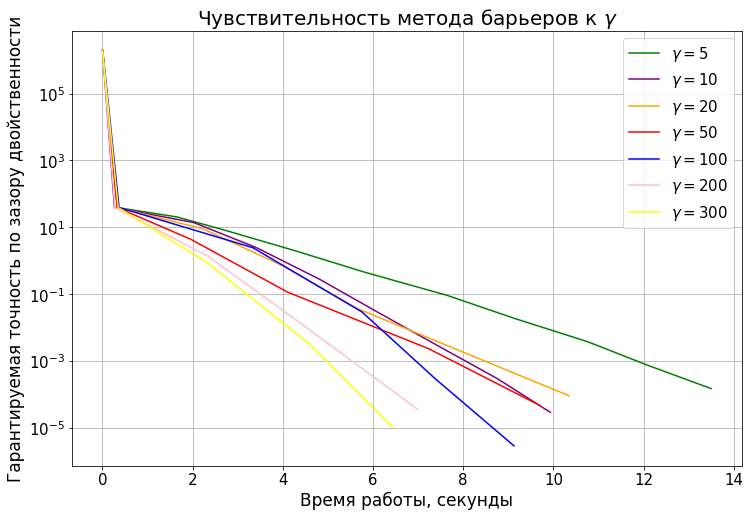

In [ ]:
X, y = get_data("w8a")
gamma_time(X, y, "w8a")

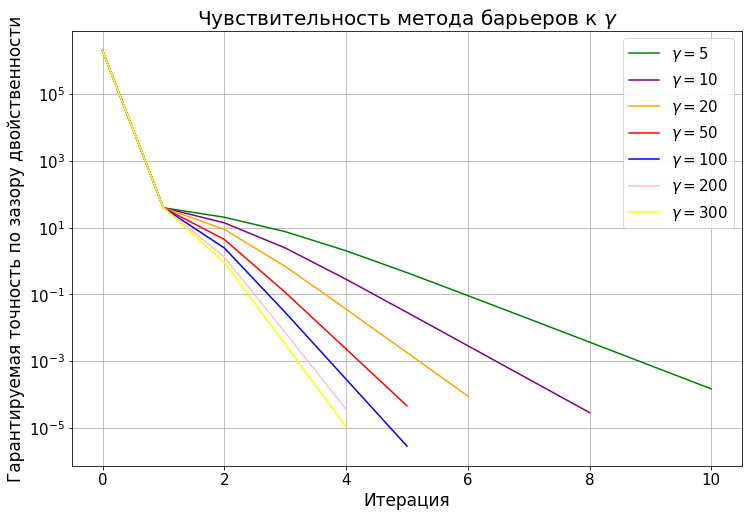

In [ ]:
X, y = get_data("w8a")
gamma_vel(X, y, "w8a")

In [ ]:
eps = [1e-1, 1e-2, 1e-3, 1e-5, 1e-7, 1e-9, 1e-11]
arr = []

In [ ]:
def eps_time(X, y, dataset):
  fig, ax = plt.subplots(figsize=(12, 8))
  lab = 'Чувствительность метода барьеров к $\epsilon_{inner}$'
  plt.xlabel('Время работы, секунды', fontsize=17)
  plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.title(lab, fontsize=20)
  ax.grid()
  plt.yscale('log')
  name = "eps_time"

  for i, e in enumerate(eps):
    x_0 = np.ones(X.shape[1]) / 2
    u_0 = np.ones(X.shape[1])
    x_opt, message, history = optimization.barrier_method_lasso(X, y, 1, x_0, u_0, 
                                                                lasso_duality_gap=oracles.lasso_duality_gap,
                                                                tolerance_inner = e, trace=True)
    arr.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], label='$\epsilon_{inner} = $' + str(e), color=colors[i])

  ax.legend(fontsize=15)
  plt.savefig(name, bbox_inches="tight")
  plt.show()

In [ ]:
def eps_vel(X, y, dataset):
  fig, ax = plt.subplots(figsize=(12, 8))
  lab = 'Чувствительность метода барьеров к $\epsilon_{inner}$'
  plt.xlabel('Итерация', fontsize=17)
  plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.title(lab, fontsize=20)
  ax.grid()
  plt.yscale('log')
  name = "eps_vel"

  for i, e in enumerate(eps):
    plt.plot(np.arange(len(arr[i])), arr[i], label='$\epsilon_{inner} = $' + str(e), color=colors[i])
  ax.legend(fontsize=15)
  plt.savefig(name, bbox_inches="tight")
  plt.show()

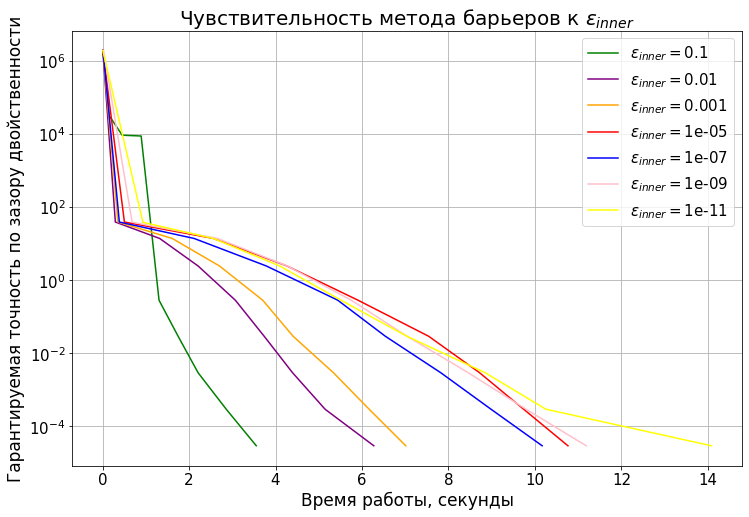

In [ ]:
X, y = get_data("w8a")
eps_time(X, y, "w8a")

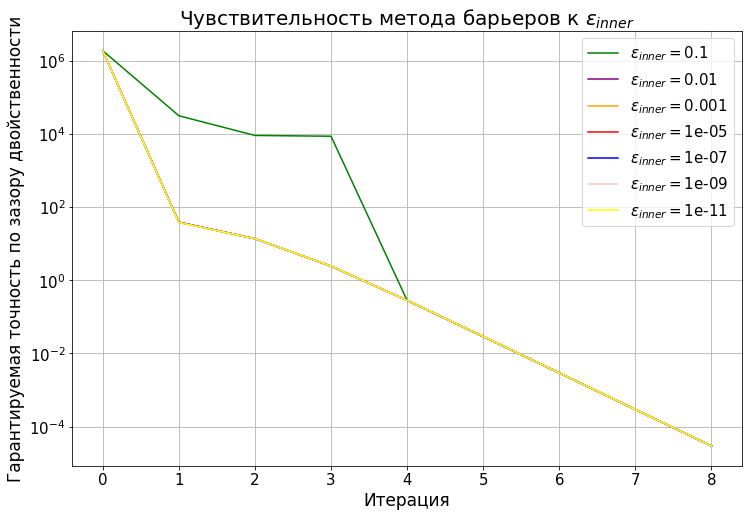

In [ ]:
X, y = get_data("w8a")
eps_vel(X, y, "w8a")

Пункт б.

In [ ]:
np.random.seed(31415)

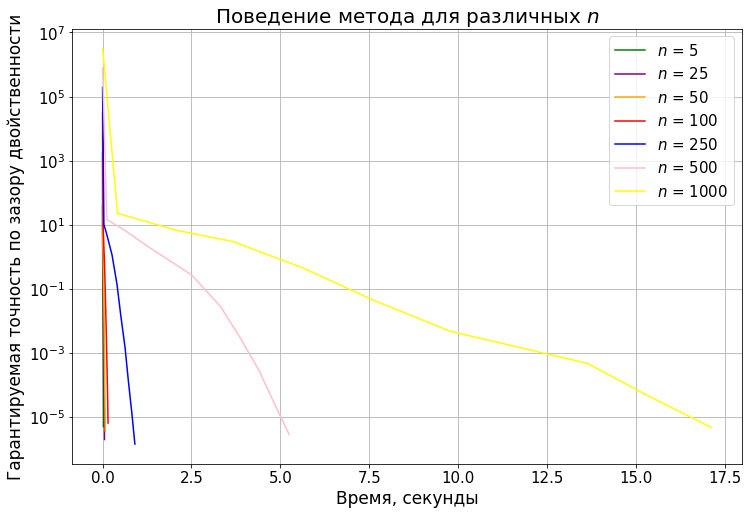

In [ ]:
n_arr = [5, 25, 50, 100, 250, 500, 1000]
m = 100

fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных $n$'
plt.xlabel('Время, секунды', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=20)
ax.grid()
plt.yscale('log')
name = "n_time"

arr = []
for i, n in enumerate(n_arr):
    A = np.random.rand(m, n)
    b = np.random.rand(m)
    
    x_0 = np.ones(n) / 2
    u_0 = np.ones(n)
    
    x_opt, message, history = optimization.barrier_method_lasso(A, b, 1, x_0, u_0, lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    arr.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], label='$n$ = ' + str(n), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()

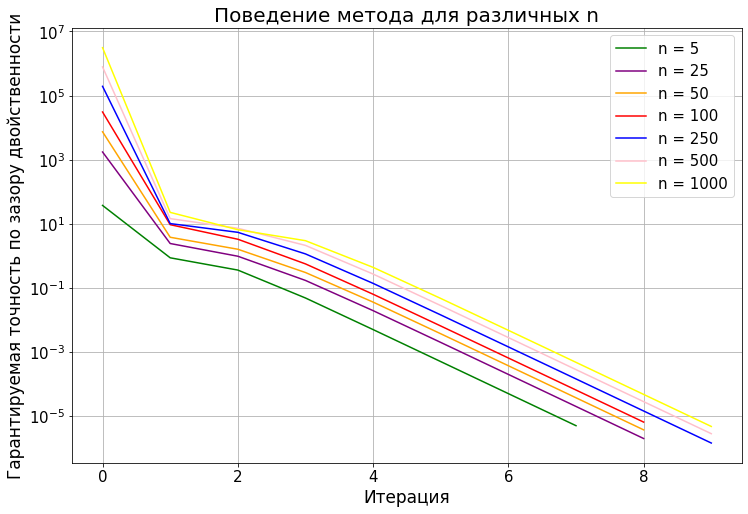

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных n'
plt.xlabel('Итерация', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=20)
ax.grid()
plt.yscale('log')
name = "n_vel"

for i, n in enumerate(n_arr):
    plt.plot(np.arange(len(arr[i])), arr[i], label='n = ' + str(n), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()

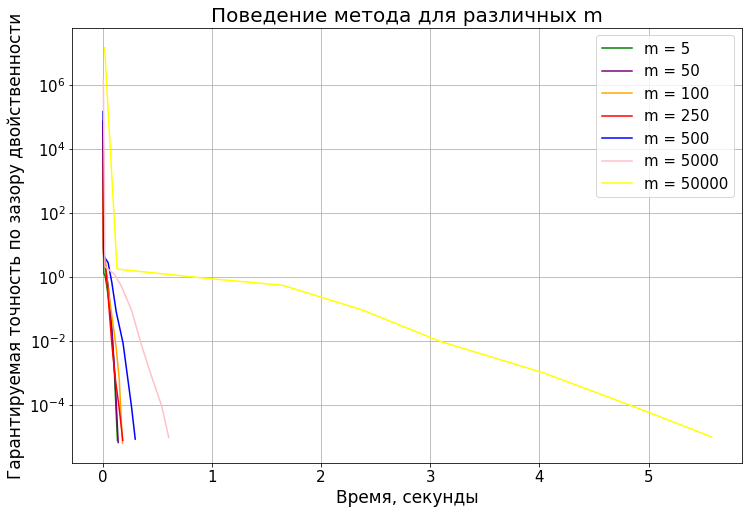

In [ ]:
m_arr = [5, 50, 100, 250, 500, 5000, 50000]
n = 100

fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных m'
plt.xlabel('Время, секунды', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=20)
ax.grid()
plt.yscale('log')
name = "m_time"

arr = []
for i, m in enumerate(m_arr):
    A = np.random.rand(m, n)
    b = np.random.rand(m)
    
    x_0 = np.ones(n) / 2
    u_0 = np.ones(n)
    
    x_opt, message, history = optimization.barrier_method_lasso(A, b, 1, x_0, u_0, lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    arr.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], label='m = ' + str(m), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()

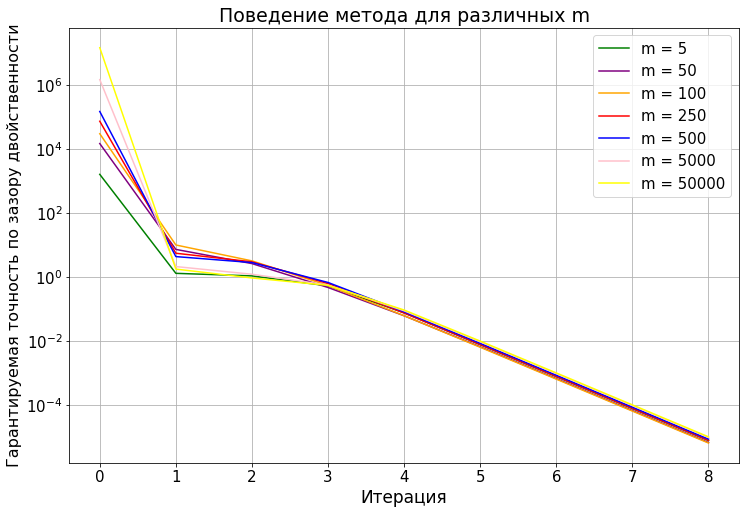

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных m'
plt.xlabel('Итерация', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=19)
ax.grid()
plt.yscale('log')
name = "m_vel"

for i, m in enumerate(m_arr):
    plt.plot(np.arange(len(arr[i])), arr[i], label='m = ' + str(m), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()

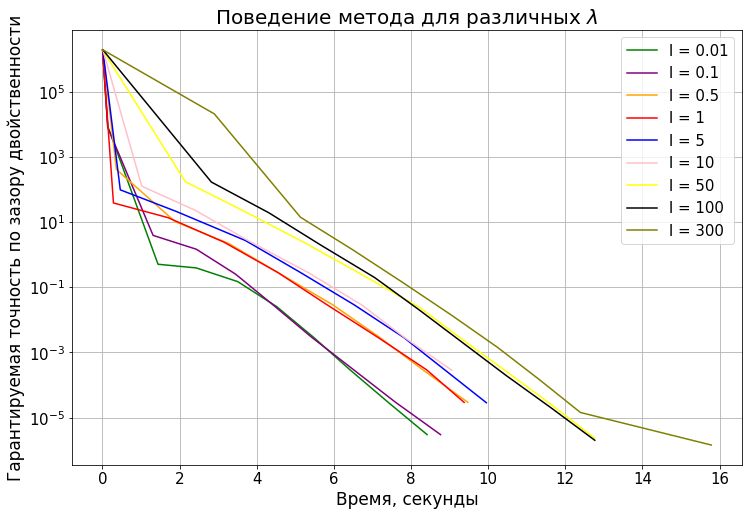

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных $\lambda$'
plt.xlabel('Время, секунды', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=20)
ax.grid()
plt.yscale('log')
name = "l_time"

X, y = get_data("w8a")
arr = []
lmb = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 300]
for i, l in enumerate(lmb):
    x_0 = np.ones(X.shape[1]) / 2
    u_0 = np.ones(X.shape[1])
    
    x_opt, message, history = optimization.barrier_method_lasso(X, y, l, x_0, u_0, lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    arr.append(history['duality_gap'])
    plt.plot(history['time'], history['duality_gap'], label='l = ' + str(l), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()

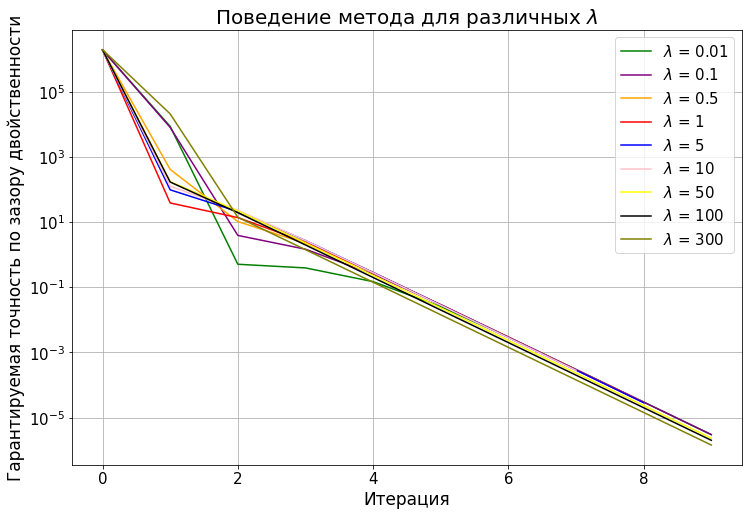

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
lab = 'Поведение метода для различных $\lambda$'
plt.xlabel('Итерация', fontsize=17)
plt.ylabel('Гарантируемая точность по зазору двойственности', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(lab, fontsize=20)
ax.grid()
plt.yscale('log')
name = "l_vel"

for i, l in enumerate(lmb):
    plt.plot(np.arange(len(arr[i])), arr[i], label='$\lambda$ = ' + str(l), color=colors[i])

ax.legend(fontsize=15)
plt.savefig(name, bbox_inches="tight")
plt.show()